# Fake News Detector using LSTM

Is it possible to identify fake news articles? In this notebook we will use Machine Learning techniques to answer this question. 

We are going to create a fake news detector with Python using LSTM. Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning to train Machine Learning models.

For this project we will use 2 datasets from Kaggel (https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset). The dataset "True.csv" has 21417 rows x 4 columns and the dataset "fake.csv" has 23481 rows × 4 columns.



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-3">Importing libraries</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-4">Loading data</a></span></li><li><span><a href="#Exploring-data" data-toc-modified-id="Exploring-data-5">Exploring data</a></span></li><li><span><a href="#Text-Cleaning" data-toc-modified-id="Text-Cleaning-6">Text Cleaning</a></span></li><li><span><a href="#Visualize-cleaned-up-dataset" data-toc-modified-id="Visualize-cleaned-up-dataset-7">Visualize cleaned up dataset</a></span></li><li><span><a href="#Prepare-the-data-by-perfoming-tokenization-and-padding" data-toc-modified-id="Prepare-the-data-by-perfoming-tokenization-and-padding-8">Prepare the data by perfoming tokenization and padding</a></span></li><li><span><a href="#Build-and-train-the-model" data-toc-modified-id="Build-and-train-the-model-9">Build and train the model</a></span></li><li><span><a href="#Assess-trained-model-performance" data-toc-modified-id="Assess-trained-model-performance-10">Assess trained model performance</a></span></li><li><span><a href="#Test-our-fake-news-detector" data-toc-modified-id="Test-our-fake-news-detector-11">Test our fake news detector</a></span></li></ul></div>

## Importing libraries

In [9]:
# we import our libraries: 

import tensorflow as tf
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('stopwords')#stopwords packege
nltk.download('wordnet')
nltk.download('tagsets')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #We use this because some text are shorter than others. All text should have the same number of words
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import plotly.express as px


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\merce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\merce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\merce\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\merce\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


## Loading data 

In [2]:
fake_df= pd.read_csv("Data/Fake.csv")
true_df= pd.read_csv("Data/True.csv")



In [3]:
# We check our data
fake_df

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [4]:
true_df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

## Exploring data

In [5]:
#Understand our data. 
# How many type of news, do we have in our fake dataset?
#We need to evaluate the column "subject"
fake_df['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [6]:
#same for true_df database: 

true_df['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [7]:
#we check if we have missing values in our data sets
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
fake_df.isnull().sum()


title      0
text       0
subject    0
date       0
dtype: int64

 There are not missing values in our datasets

In [9]:
# We check the data type in the "true" data set
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [10]:
# Same for "fake" dataset
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


both datasets are compound by categorical columns. 

In [11]:
#now we will create a new column in each dataset called "fake_new"
#At the same time we will create 2 clases: is true=1 and is fake=0
true_df["fake_new"]=1

In [12]:
fake_df["fake_new"]=0

In [13]:
#now we concatenate both datasets
data_df=pd.concat([true_df,fake_df],axis=0).reset_index(drop=True)
data_df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  fake_new  
0      December 31, 2017          1  
1      December 29, 2017          1  
2      December 31, 2017          1  
3      December 30, 2017          1  
4      December 29, 2017          1  
...                   ...       ...  
44893    January 16, 2016         0  
44894    January 16, 2016         0  
44895    January 15, 2016         0  
44896    January 14, 2016         0  
44897    January 12, 2016         0  

[44898 rows x 5 columns]

In [14]:
# we need to drop date column
data_df.drop(columns=["date"],inplace=True)

In [15]:
data_df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       fake_new  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
44893         0  
44894         0  
44895         0  
44896         0  
44897         0  

[44898 rows x 4 columns]

In [16]:
#we want to join all text data in one single column.We will create a new column called "completed_text"
data_df["completed_text"]=data_df["title"]+data_df["text"]

In [17]:
data_df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       fake_new                                     completed_text  
0             1  As U.S. budget fight looms, Republicans flip t...  
1             1  U.S. military to accept transgender recruits o...  
2             1  Senior U.S. Republican senator: 'Let Mr. Muell...  
3             1  FBI Russia probe helped by Australian diplomat...  
4             1  Trump wants Postal Service to charge 'much mor...  
...         ...                                                ...  
44893         0  McPain: John McCain Furious That Iran Treated ...  
44894         0  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  
44895         0  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  
44896         0  How to Blow $700 Million: Al Jazeera America F...  
44897         0  10 U.S. Navy Sailors Held by Iranian Military ...  

[44898 rows x 5 columns]

In [18]:
# to check how looks the first cell of the new column 
data_df["completed_text"][0]

'As U.S. budget fight looms, Republicans flip their fiscal scriptWASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-

## Text Cleaning

In [19]:
#now he are going to get the stopwords for English
stop_words = list(stopwords.words('english')) 
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
#get additional stop words from nltk
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [21]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [22]:
# Apply the function to the dataframe
data_df['clean_text'] = data_df['completed_text'].apply(preprocess)

In [23]:
# Now we can compare the columns "completed_text" and "clean_text"
#Show completed_text news
data_df['completed_text'][0]

'As U.S. budget fight looms, Republicans flip their fiscal scriptWASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-

In [24]:
# Show cleaned up news after removing stopwords
print(data_df['clean_text'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'education', 'scientific', 'rese

In [25]:
# Obtain the total words present in the dataset
list_of_words = []
for i in data_df.clean_text:
    for j in i:
        list_of_words.append(j)


In [26]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 'increases',
 'defense',
 '

In [27]:
len(list_of_words)

9252432

In [28]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

122995

In [29]:
# join the words into a string
data_df['clean_joined'] = data_df['clean_text'].apply(lambda x: " ".join(x))

In [30]:
data_df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       fake_new                                     completed_text  \
0             1  As U.S. budget fight looms, Republicans flip t...   
1             1  U.S. military to accept transgender recruits o...   
2             1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3             1  FBI Russia probe helped by Australian diplomat...   
4             1  Trump wants Postal Service to charge 'much mor...   
...         ...                                                ...   
44893         0  McPain: John McCain Furious That Iran Treated ...   
44894         0  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895         0  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896         0  How to Blow $700 Million: Al Jazeera America F...   
44897         0  10 U.S. Navy Sailors Held by Iranian Military ...   

                                              clean_text  \
0      [budget, fight, looms, republicans, flip, fisc...   
1      [military, accept, transgender, recruits, mond...   
2      [senior, republican, senator, mueller, washing...   
3      [russia, probe, helped, australian, diplomat, ...   
4      [trump, wants, postal, service, charge, amazon...   
...                                                  ...   
44893  [mcpain, john, mccain, furious, iran, treated,...   
44894  [justice, yahoo, settles, mail, privacy, class...   
44895  [sunnistan, allied, safe, zone, plan, territor...   
44896  [blow, million, jazeera, america, finally, cal...   
44897  [navy, sailors, held, iranian, military, signs...   

                                            clean_joined  
0      budget fight looms republicans flip fiscal reu...  
1      military accept transgender recruits monday re...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat nytwas...  
4      trump wants postal service charge amazon washi...  
...                                                  ...  
44893  mcpain john mccain furious iran treated sailor...  
44894  justice yahoo settles mail privacy class actio...  
44895  sunnistan allied safe zone plan territorial bo...  
44896  blow million jazeera america finally calls qui...  
44897  navy sailors held iranian military signs neoco...  

[44898 rows x 7 columns]

In [31]:
data_df['clean_joined'][0]

'budget fight looms republicans flip fiscal reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise percent fiscal con

## Visualize cleaned up dataset

In [32]:
data_df


title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       fake_new                                     completed_text  \
0             1  As U.S. budget fight looms, Republicans flip t...   
1             1  U.S. military to accept transgender recruits o...   
2             1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3             1  FBI Russia probe helped by Australian diplomat...   
4             1  Trump wants Postal Service to charge 'much mor...   
...         ...                                                ...   
44893         0  McPain: John McCain Furious That Iran Treated ...   
44894         0  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895         0  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896         0  How to Blow $700 Million: Al Jazeera America F...   
44897         0  10 U.S. Navy Sailors Held by Iranian Military ...   

                                              clean_text  \
0      [budget, fight, looms, republicans, flip, fisc...   
1      [military, accept, transgender, recruits, mond...   
2      [senior, republican, senator, mueller, washing...   
3      [russia, probe, helped, australian, diplomat, ...   
4      [trump, wants, postal, service, charge, amazon...   
...                                                  ...   
44893  [mcpain, john, mccain, furious, iran, treated,...   
44894  [justice, yahoo, settles, mail, privacy, class...   
44895  [sunnistan, allied, safe, zone, plan, territor...   
44896  [blow, million, jazeera, america, finally, cal...   
44897  [navy, sailors, held, iranian, military, signs...   

                                            clean_joined  
0      budget fight looms republicans flip fiscal reu...  
1      military accept transgender recruits monday re...  
2      senior republican senator mueller washington r...  
3      russia probe helped australian diplomat nytwas...  
4      trump wants postal service charge amazon washi...  
...                                                  ...  
44893  mcpain john mccain furious iran treated sailor...  
44894  justice yahoo settles mail privacy class actio...  
44895  sunnistan allied safe zone plan territorial bo...  
44896  blow million jazeera america finally calls qui...  
44897  navy sailors held iranian military signs neoco...  

[44898 rows x 7 columns]

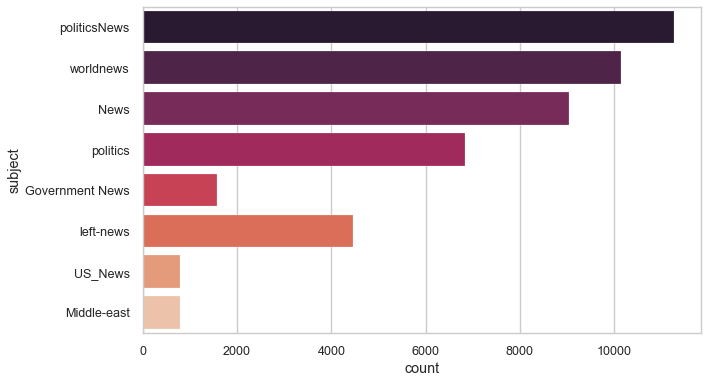

In [61]:
# plot the number of samples in 'subject'
plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")
sns.countplot(y = "subject", data = data_df,palette='rocket')
plt.show()

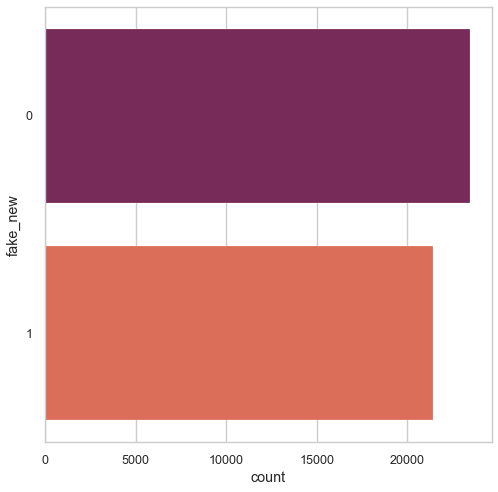

In [34]:
#Plot the count plot for fake vs. true news
plt.figure(figsize = (8, 8))
sns.set_style("whitegrid")
sns.countplot(y = "fake_new", data = data_df,palette='rocket')
plt.show()

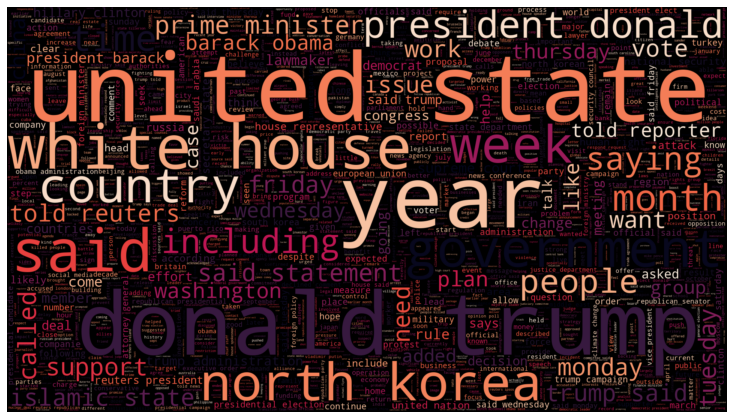

In [35]:
# plot the word cloud for text that is Real
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1920 , height = 1080 ,colormap='rocket', stopwords = stop_words).generate(" ".join(data_df[data_df.fake_new == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

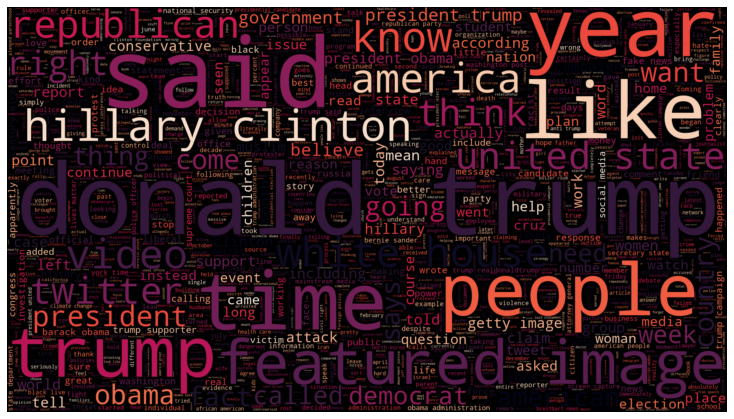

In [36]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1920 , height = 1080 ,colormap='rocket', stopwords = stop_words).generate(" ".join(data_df[data_df.fake_new == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [37]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in data_df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [38]:
# visualize the distribution of number of words in a text

fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in data_df.clean_joined], nbins = 100)
fig.show()

## Prepare the data by perfoming tokenization and padding


Tokenizer allows us to vectorize text corpus by turning each text into a sequence of integers

In [39]:
# split data into test and train 

x_train, x_test, y_train, y_test = train_test_split(data_df.clean_joined, data_df.fake_new, test_size = 0.2)

In [40]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [41]:
print("The encoding for document\n",data_df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need governmen

In [43]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [44]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [4736 3038    1    5 5141 1759  206   24   26    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
The padded encoding for document 2  is :  [   70  1016   184  9487   121  3400  1337 19129     8    70 10267   184
  3400  1337   158     5   676 26130  4641 18254    70  2617   477  1334
    69    93  8060    21   152  4641 11200    70  3381  3198    62   308
   178 13875   118   477]


## Build and train the model

In [45]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))



# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         15743360  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 16,039,553
Trainable params: 16,039,553
Non-trainable params: 0
_________________________________________________________________


In [46]:
total_words

122995

In [47]:
y_train = np.asarray(y_train)

In [48]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
506/506 [==============================] - 203s 391ms/step - loss: 0.0403 - acc: 0.9839 - val_loss: 0.0072 - val_acc: 0.9989
Epoch 2/2
506/506 [==============================] - 186s 368ms/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0085 - val_acc: 0.9983


## Assess trained model performance

In [49]:
# make prediction
pred = model.predict(padded_test)

In [50]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [51]:
# getting the accuracy


accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9915367483296214


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

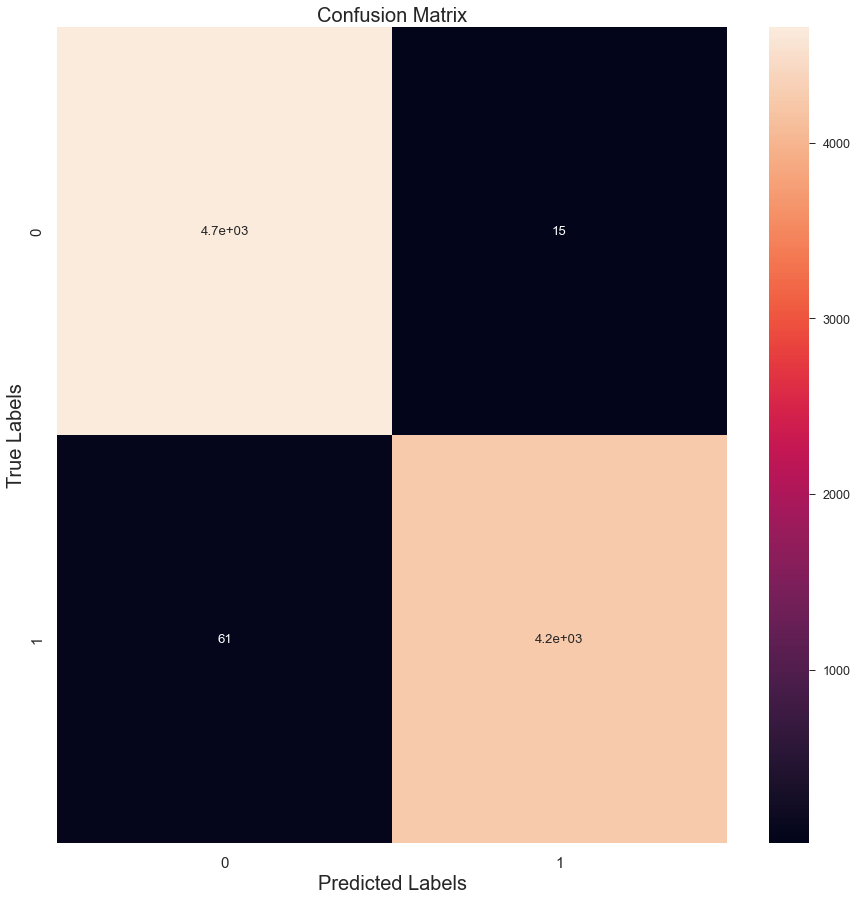

In [52]:
# get the confusion matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (15, 15))
ax= plt.subplot()
sns.heatmap(cm,cmap='rocket', annot = True, ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

In [53]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}

## Test our fake news detector

In [78]:
# x is the new we want to anlize
x=['this is new']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen = 40, truncating = 'post')
(model.predict(x)>=0.5).astype(int)

array([[0]])

This is a fake news

In [69]:
#Let's try a real new
# The link of the new is: https://www.deutschland.de/en/news/coronavirus-in-germany-information
x=['Berlin (dpa) - Federal Health Minister Karl Lauterbach opposes the abolition of the vast majority of state Corona restrictions as of 20 March. The SPD politician said that the virus would not be impressed by a "Freedom Day". "The pandemic cannot be ended by a celebration." Even after 20 March, when many protective measures are to be removed, the federal states would need more tools to fight the pandemic than testing and wearing masks. "That is not nearly enough to respond to future waves," Lauterbach said. They would "rather have to be able to make gatherings safer in regional hotspots by restricting access". A new, nationwide legal basis is being sought for this.']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen = 40, truncating = 'post')
(model.predict(x)>=0.5).astype(int)



array([[1]])

This is real news

In [79]:
# New's link: https://www.economist.com/international/2022/02/25/the-west-struggles-to-respond-forcefully-to-russias-war-in-ukraine
x=['“PUTIN’S AGGRESSION against Ukraine will end up costing Russia dearly, economically and strategically. We will make sure of that.” With these fighting words, President Joe Biden announced on February 24th that America would impose sweeping economic sanctions on Russia for its invasion of Ukraine. The measures freeze the American assets of Russia’s biggest banks, hamper its ability to raise debt, restrict its import of high-tech goods and seize the wealth of its elites and their children. Britain and the EU announced similar steps']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen = 40, truncating = 'post')
(model.predict(x)>=0.5).astype(int)

array([[1]])

this a real new

In [80]:
# New's link: https://english.elpais.com/international/2022-02-25/mobile-world-congress-cancels-russian-pavilion-over-ukraine-invasion.html 
x=['The Mobile World Congress (MWC) announced on Friday the cancellation of the Russian pavilion at the congress in condemnation of Russia’s invasion of Ukraine. In a statement, GSMA, the organizer of the event, which is the largest trade show of the telecom industry, said that it “strongly condemns the Russian invasion of Ukraine and is following “all government sanctions and policies” resulting from the conflict.']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen = 40, truncating = 'post')
(model.predict(x)>=0.5).astype(int)

array([[1]])

it is a real new

In [81]:
# New's link: https://www.bostonherald.com/2022/02/22/battenfeld-republicans-rolling-the-dice-on-donald-trump-in-the-midterm-elections/
x=['Republicans are rolling the dice on Donald Trump and his $124 million war chest in the midterm elections, betting that the former president won’t drag down the party with him. Trump has made it known he intends to be a kingmaker — like he has in Massachusetts by endorsing gubernatorial candidate Geoff Diehl — despite some GOP senatorial candidates shunning him.The media elite continue to belittle Trump in an attempt to torpedo his potential 2024 campaign, but that has only bolstered him among his die-hard supporters.Trump has endorsed more than 100 candidates in the run-up to this fall’s election, and in some states, Republican candidates are falling over themselves to gain his endorsement. ']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen = 40, truncating = 'post')
(model.predict(x)>=0.5).astype(int)

array([[0]])

It is a Fake new